In [1]:
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import numpy as np
from numpy import genfromtxt
import pandas as pd
import datetime
import seaborn as sns
from scipy.stats import pearsonr
import itertools
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import interp1d
from matplotlib.patches import ConnectionPatch

In [2]:
drive_loc = 'data/'

In [3]:
data = pd.read_csv(drive_loc + 'lstid_driver_full_2017.csv')
data['date'] = pd.to_datetime(data['date'])
data['ae_max'].replace('1,070.00', '1070', inplace=True)
data['ae_max'] = data['ae_max'].astype(float)

/tmp/ipykernel_9129/2678845190.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ae_max'].replace('1,070.00', '1070', inplace=True)


In [4]:
reference_time = data['date'].iloc[0]
data['date_s'] = (data['date'] - reference_time).dt.total_seconds()
data['dpv'] = np.gradient(data['pv'], (data['date_s']))
data['dsme'] = np.gradient(data['sme'])

In [5]:
data['amplitude_km'] = data['amplitude_km'].interpolate()
data['T_hr'] = data['T_hr'].interpolate()

In [6]:
T_hr_cmap='rainbow'

In [7]:
data

,Unnamed: 0,date,pv,tid,ae_slope,ae_max,varea,u_nh,u_slope,sym_h,k_winds,sme,airs,xrsb_flux,T_hr,amplitude_km,is_lstid,date_s,dpv,dsme
0,0,2017-01-01,1.338138,0,0,464.666667,33.656567,52.112160,0.000000,-19.538194,0,286.407639,0.117922,0.000000e+00,1.572713,16.838554,False,0.0,2.778686e-07,-62.374306
1,1,2017-01-02,1.362146,9,-244,463.750000,34.373220,59.995500,7.883340,-17.284722,0,224.033333,0.121230,0.000000e+00,2.685990,49.904989,True,86400.0,-1.650402e-07,-18.565625
2,2,2017-01-03,1.309619,9,91,519.250000,34.830030,62.004780,2.009280,-13.979167,0,249.276389,0.140051,0.000000e+00,2.576547,64.228160,True,172800.0,-1.359938e-06,3.948958
3,3,2017-01-04,1.127149,0,102,765.333333,34.022686,70.649390,8.644610,-9.715278,0,231.931250,0.147170,0.000000e+00,1.349773,7.122879,False,259200.0,-1.822224e-06,52.003472
4,4,2017-01-05,0.994739,4,-61,620.583333,32.566230,73.907326,3.257936,-14.225694,0,353.283333,0.177134,0.000000e+00,2.537559,42.390323,True,345600.0,-1.385799e-06,51.598264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,2017-12-27,1.314453,4,-337,404.000000,21.484190,88.051346,6.267861,-6.899306,0,193.418750,0.134835,5.570000e-08,3.002404,44.009141,True,31104000.0,-6.323609e-07,-61.784375
361,361,2017-12-28,1.237787,0,-258,186.833333,24.289408,88.984360,0.933014,-6.746528,0,114.490972,0.157334,1.280000e-06,1.394661,17.159032,False,31190400.0,-2.112782e-07,-47.492708
362,362,2017-12-29,1.277944,0,33,218.166667,23.129710,85.255360,-3.729000,-2.010417,0,98.433333,0.119963,1.290000e-07,2.585652,71.762913,True,31276800.0,5.507731e-07,1.086458
363,363,2017-12-30,1.332961,0,100,231.333333,23.887358,80.555470,-4.699890,1.579861,0,116.663889,0.128906,3.040000e-08,1.918663,28.574349,True,31363200.0,7.528429e-07,7.506250


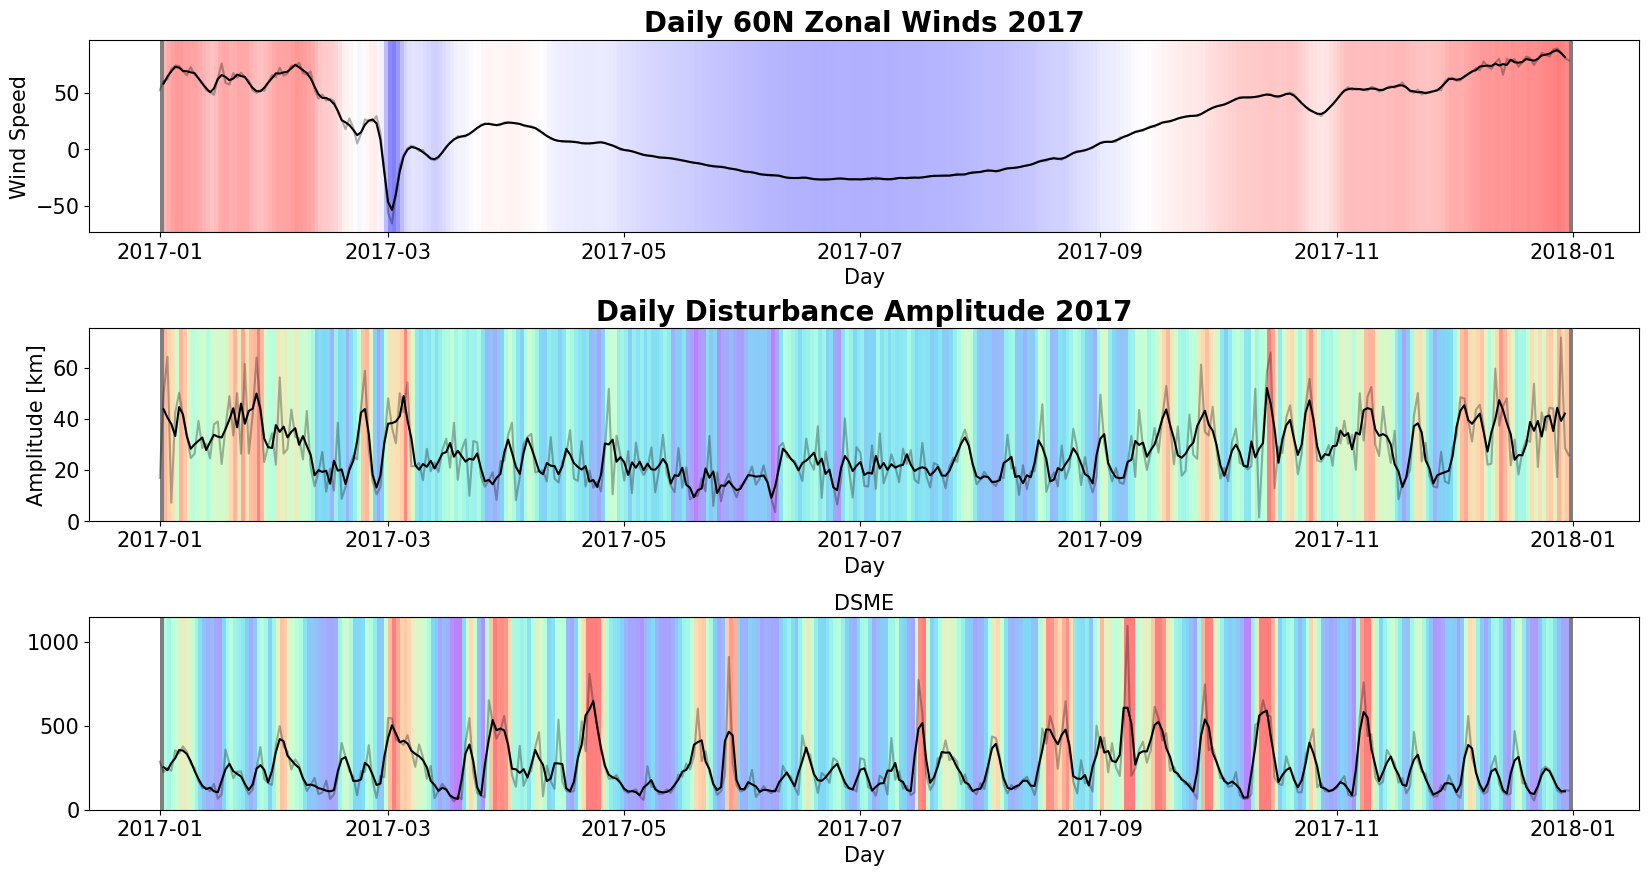

In [8]:
fig, axs = plt.subplots(3,1,figsize=(20,10)) 
plt.subplots_adjust(hspace=0.5)

vmin            = np.nanmin(data['u_nh'].rolling(3,center=True).mean())
vmax            = np.nanmax(data['u_nh'].rolling(3,center=True).mean())

cmap            = mpl.colormaps.get_cmap('bwr')
norm            = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
mpbl            = mpl.cm.ScalarMappable(norm,cmap)
color           = mpbl.to_rgba(data['u_nh'].rolling(3,center=True).mean())

axs[0].plot(data['date'], data['u_nh'], color = 'black',alpha=0.3)
axs[0].plot(data['date'], data['u_nh'].rolling(3,center=True).mean(), color='black')
axs[0].scatter(data['date'],data['u_nh'].rolling(3,center=True).mean(),marker='o',c=color,alpha=0)
trans           = mpl.transforms.blended_transform_factory( axs[0].transData, axs[0].transAxes)
axs[0].bar(data['date'],1,width=1,color=color,align='edge',zorder=-1,transform=trans,alpha=0.5)
axs[0].set_title('Daily 60N Zonal Winds 2017', fontsize = 20,fontweight = 'bold')
axs[0].set_ylabel('Wind Speed',fontsize = 15)
axs[0].set_xlabel('Day',fontsize = 15)
axs[0].tick_params(labelsize = 15)

vmin            = np.nanmin(data['amplitude_km'].rolling(3,center=True).mean())
vmax            = 50

cmap            = mpl.colormaps.get_cmap(T_hr_cmap)
norm            = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
mpbl            = mpl.cm.ScalarMappable(norm,cmap)
color           = mpbl.to_rgba(data['amplitude_km'].rolling(3,center=True).mean())

axs[1].plot(data['date'], data['amplitude_km'], color = 'black',alpha=0.3)
axs[1].plot(data['date'], data['amplitude_km'].rolling(3,center=True).mean(), color='black')
axs[1].scatter(data['date'],data['amplitude_km'].rolling(3,center=True).mean(),marker='o',c=color,alpha=0)
trans           = mpl.transforms.blended_transform_factory( axs[1].transData, axs[1].transAxes)
axs[1].bar(data['date'],1,width=1,color=color,align='edge',zorder=-1,transform=trans,alpha=0.5)
axs[1].set_title('Daily Disturbance Amplitude 2017', fontsize = 20,fontweight = 'bold')
axs[1].set_ylabel('Amplitude [km]',fontsize = 15)
axs[1].set_xlabel('Day',fontsize = 15)
axs[1].tick_params(labelsize = 15)

vmin            = np.nanmin(data['sme'].rolling(3,center=True).mean())
vmax            = 500

cmap            = mpl.colormaps.get_cmap(T_hr_cmap)
norm            = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
mpbl            = mpl.cm.ScalarMappable(norm,cmap)
color           = mpbl.to_rgba(data['sme'].rolling(3,center=True).mean())

axs[2].plot(data['date'], data['sme'], color = 'black',alpha=0.3)
axs[2].plot(data['date'], data['sme'].rolling(3,center=True).mean(), color='black')
axs[2].scatter(data['date'],data['sme'].rolling(3,center=True).mean(),marker='o',c=color,alpha=0)
trans           = mpl.transforms.blended_transform_factory( axs[2].transData, axs[2].transAxes)
axs[2].bar(data['date'],1,width=1,color=color,align='edge',zorder=-1,transform=trans,alpha=0.5)
axs[2].set_title('DSME',fontsize = 15)
axs[2].set_xlabel('Day',fontsize = 15)
axs[2].tick_params(labelsize = 15)


#fig.savefig(drive_loc + 'filter_value_finder/'+str(oname)+'.png')

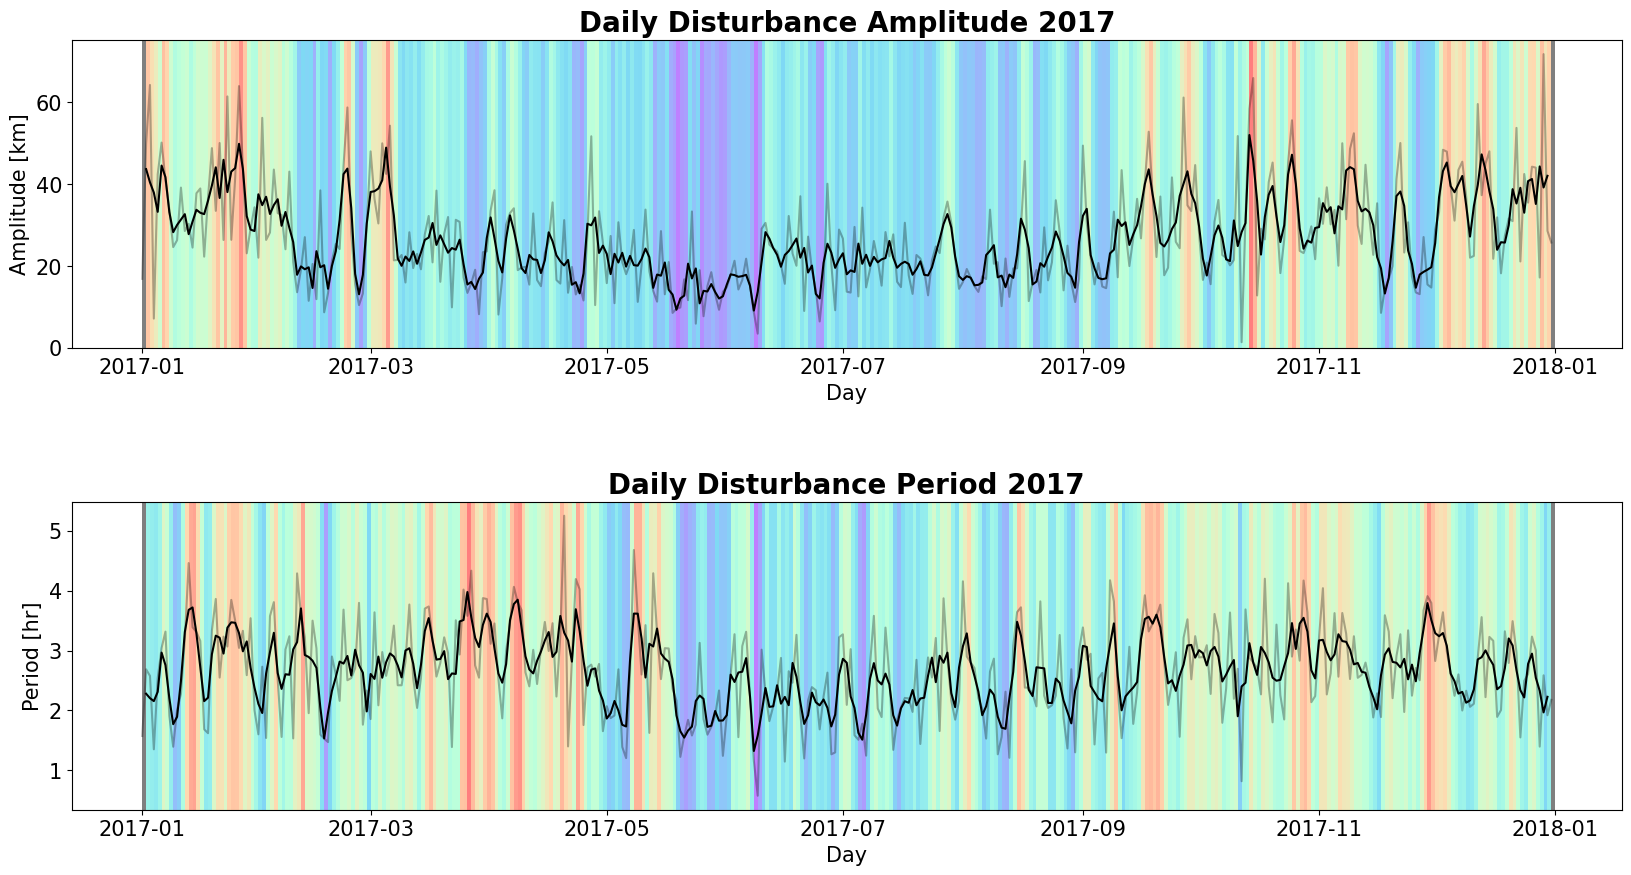

In [9]:
fig, axs = plt.subplots(2,1,figsize=(20,10)) 
plt.subplots_adjust(hspace=0.5)

vmin            = np.nanmin(data['amplitude_km'].rolling(3,center=True).mean())
vmax            = np.nanmax(data['amplitude_km'].rolling(3,center=True).mean())

cmap            = mpl.colormaps.get_cmap(T_hr_cmap)
norm            = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
mpbl            = mpl.cm.ScalarMappable(norm,cmap)
color           = mpbl.to_rgba(data['amplitude_km'].rolling(3,center=True).mean())

axs[0].plot(data['date'], data['amplitude_km'], color = 'black',alpha=0.3)
axs[0].plot(data['date'], data['amplitude_km'].rolling(3,center=True).mean(), color='black')
axs[0].scatter(data['date'],data['amplitude_km'].rolling(3,center=True).mean(),marker='o',c=color,alpha=0)
trans           = mpl.transforms.blended_transform_factory( axs[0].transData, axs[0].transAxes)
axs[0].bar(data['date'],1,width=1,color=color,align='edge',zorder=-1,transform=trans,alpha=0.5)
axs[0].set_title('Daily Disturbance Amplitude 2017', fontsize = 20,fontweight = 'bold')
axs[0].set_ylabel('Amplitude [km]',fontsize = 15)
axs[0].set_xlabel('Day',fontsize = 15)
axs[0].tick_params(labelsize = 15)

vmin            = np.nanmin(data['T_hr'].rolling(3,center=True).mean())
vmax            = np.nanmax(data['T_hr'].rolling(3,center=True).mean())

cmap            = mpl.colormaps.get_cmap(T_hr_cmap)
norm            = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
mpbl            = mpl.cm.ScalarMappable(norm,cmap)
color           = mpbl.to_rgba(data['T_hr'].rolling(3,center=True).mean())

axs[1].plot(data['date'], data['T_hr'], color = 'black',alpha=0.3)
axs[1].plot(data['date'], data['T_hr'].rolling(3,center=True).mean(), color='black')
axs[1].scatter(data['date'],data['T_hr'].rolling(3,center=True).mean(),marker='o',c=color,alpha=0)
trans           = mpl.transforms.blended_transform_factory( axs[1].transData, axs[1].transAxes)
axs[1].bar(data['date'],1,width=1,color=color,align='edge',zorder=-1,transform=trans,alpha=0.5)
axs[1].set_title('Daily Disturbance Period 2017', fontsize = 20,fontweight = 'bold')
axs[1].set_ylabel('Period [hr]',fontsize = 15)
axs[1].set_xlabel('Day',fontsize = 15)
axs[1].tick_params(labelsize = 15)

In [10]:
df=data
df.set_index('date',inplace=True)
df_sum = df.resample('M').sum()
df_mean = df.resample('M').mean()

/tmp/ipykernel_9129/4188447099.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_sum = df.resample('M').sum()
/tmp/ipykernel_9129/4188447099.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mean = df.resample('M').mean()


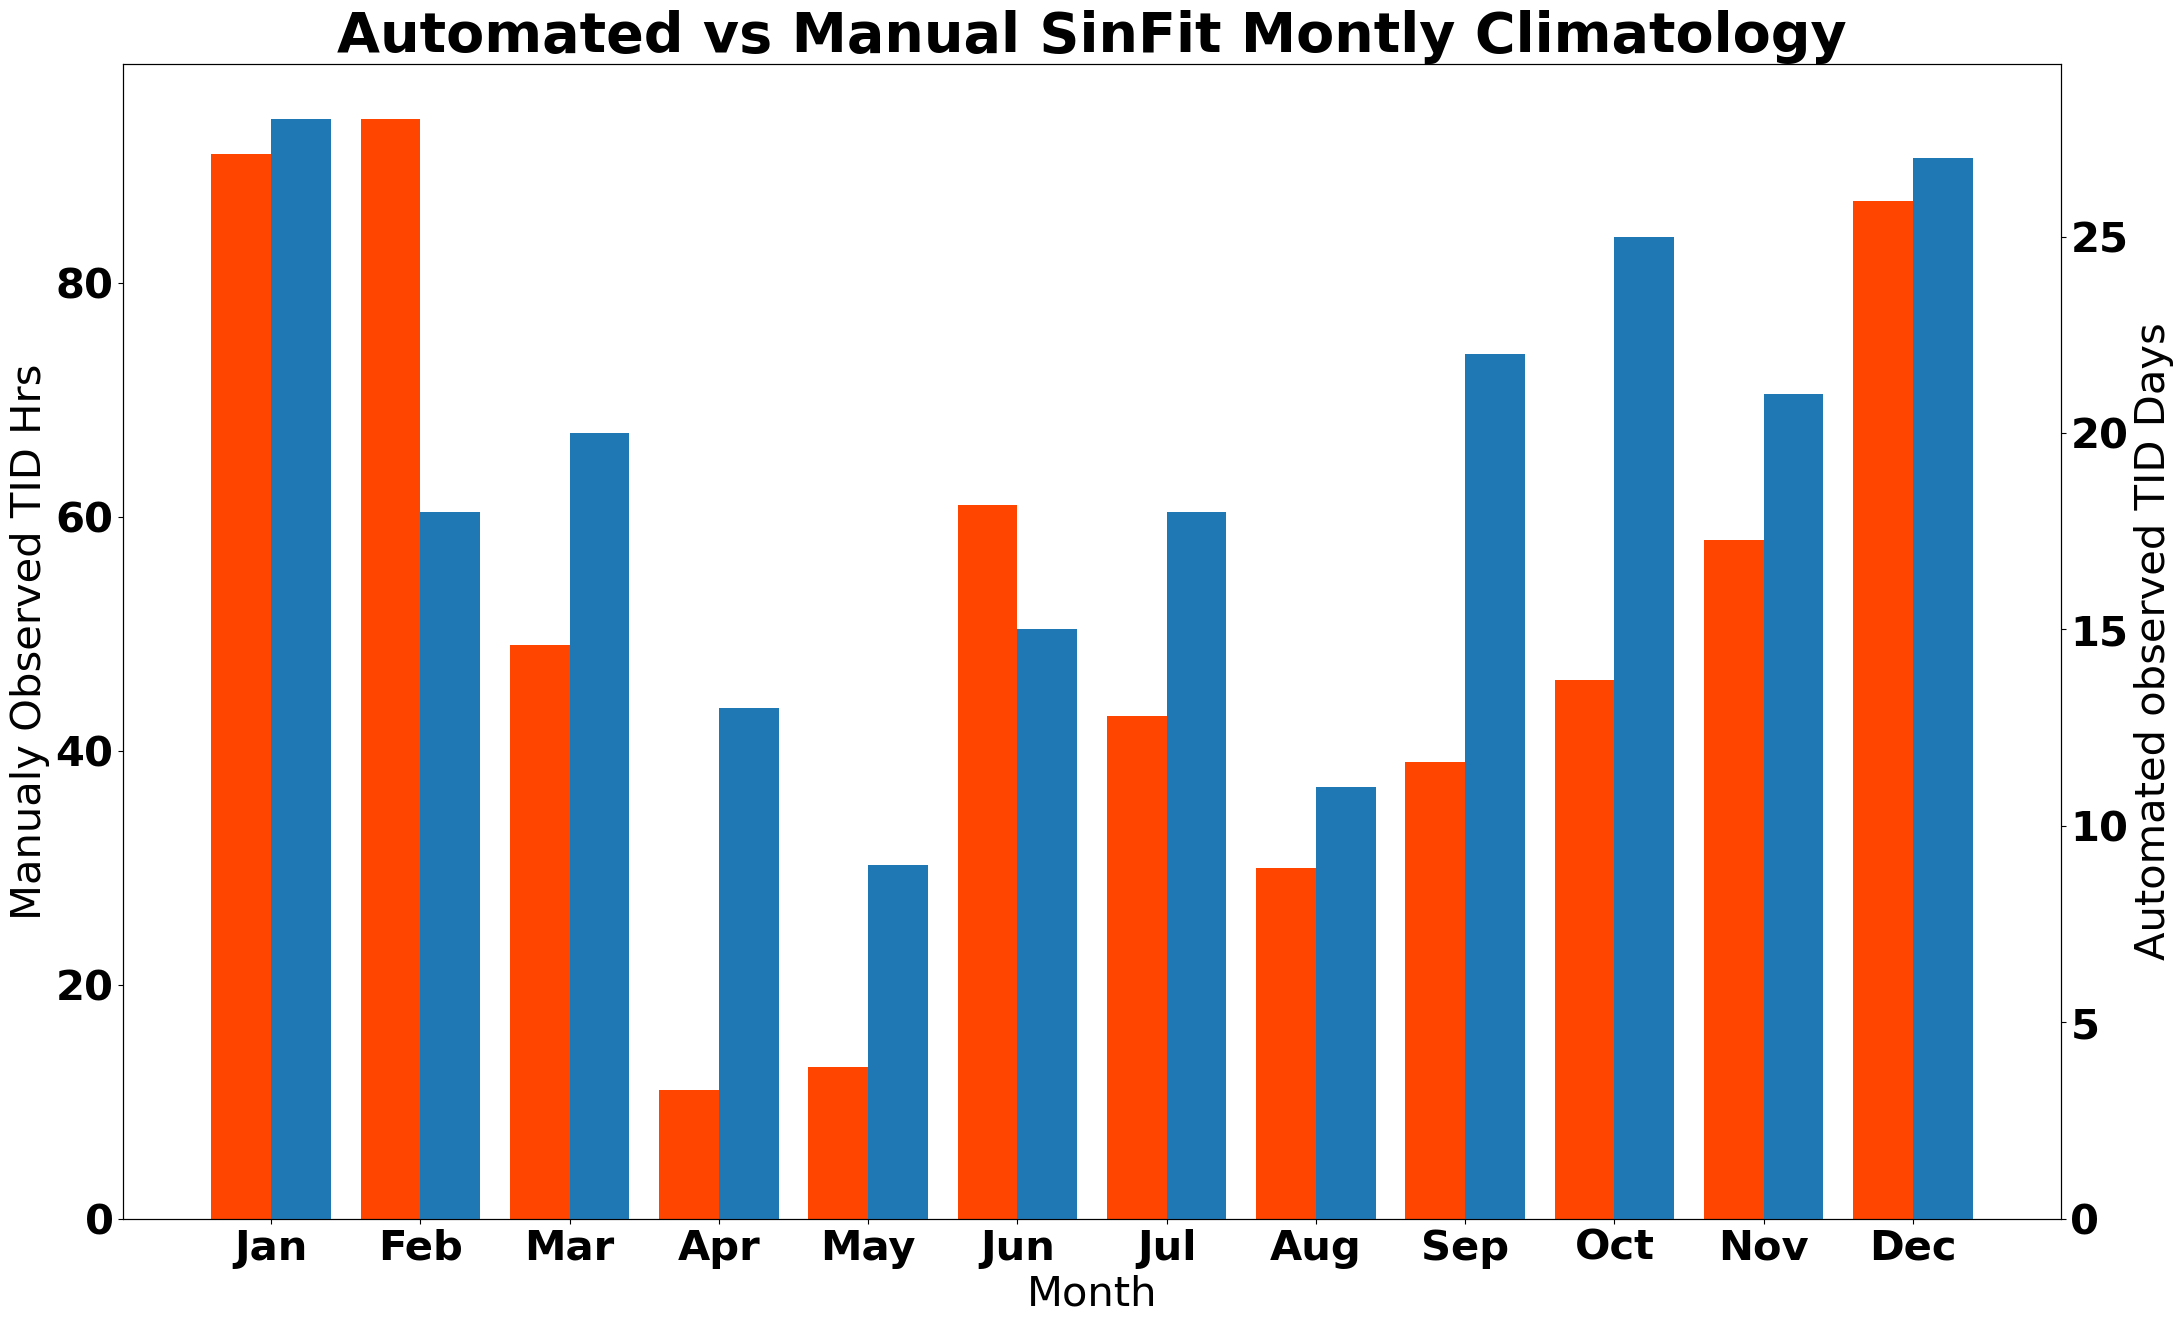

In [11]:
n = 12
index = np.arange(n)
width = 0.4
xLabel = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax1 = plt.subplots(figsize=(25, 15))

# Create the first bar plot
ax1.bar(index - 0.2, df_sum['tid'], width=0.4, color='orangered', align='center')
ax1.set_ylabel('Manualy Observed TID Hrs',fontsize=30)
ax1.tick_params(axis='y', labelsize=30)

# Create twin axes for the second bar plot
ax2 = ax1.twinx()
ax2.bar(index + 0.2, df_sum['is_lstid'], width=0.4, align='center')
ax2.set_ylabel('Automated observed TID Days', fontsize=30)
ax2.tick_params(axis='y', labelsize=30)

# Manually set font weight for y-axis tick labels
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')
for label in ax2.get_yticklabels():
    label.set_fontweight('bold')

# Set common labels and title
ax1.set_xlabel('Month', fontsize=30)
ax1.set_xticks(index)
ax1.set_xticklabels(xLabel, fontsize=30, fontweight='bold')
plt.title('Automated vs Manual SinFit Montly Climatology', fontsize=40, fontweight='bold')

# Show plot
plt.show()